## Regression 

Regression 是回归问题，而 Logistic Regression 是分类问题。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

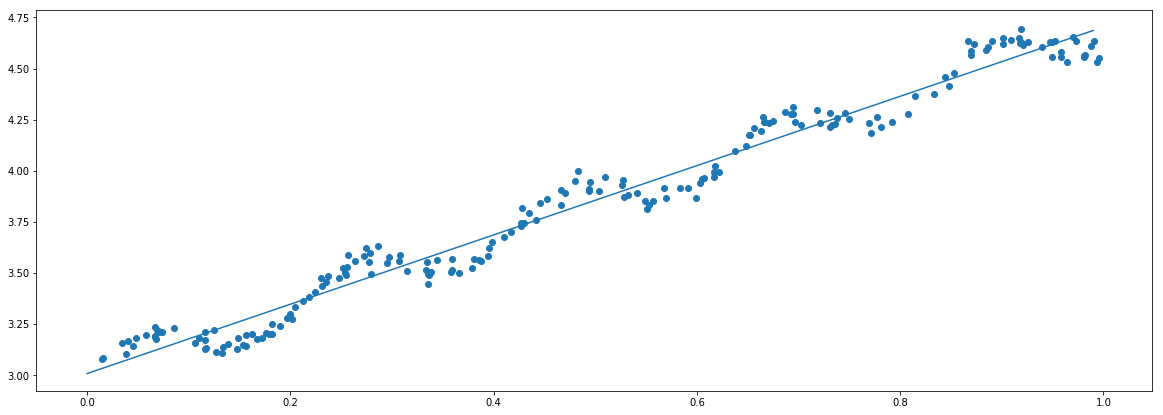

[[ 1.          0.98647356]
 [ 0.98647356  1.        ]]


In [163]:
def loadData(file):
    data = np.loadtxt(file)
    features = data[:,0:-1]
    labels = data[:,-1]
    return features, labels

def olr_weights(features, labels):
    '''Ordinary Linear Regression '''
    X = np.mat(features)
    y = np.mat(labels[:, np.newaxis])
    
    if (np.linalg.det(X.T * X) == 0):
        print('The X is a singular matrix')
        return
    else:
        return (X.T * X).I * X.T * y

def plot_olr_regression(features, labels, weights):
    plt.figure(figsize=(20,7))
    plt.scatter(features[:,1], labels)
    x = np.arange(0, 1, 0.01)
    y = weights[1] * x + weights[0]
    plt.plot(x, np.squeeze(np.asarray(y)))
    plt.show()
    
def main():
    features, labels = loadData('ex0.txt')
    weights = olr_weights(features, labels)
    plot_olr_regression(features, labels, weights)
    # 查看 correlation coefficients
    yHat = np.mat(features) * weights
    y = np.mat(labels[:, np.newaxis])
    print(np.corrcoef(yHat.T, y.T))


if __name__ == '__main__':
    main()


### 局部加权线性回归
从上面的回归还不错，yHat 与 y 的相关系数是 0.98。但是上面的回归过程中对所有的样本都是统一处理的，即基于上面的回归模型，我们要预测一点的值，这点值对所有样本权重都是一样一视同仁。但是，一个更理想的情况是离这点距离近的权重大，而离这点距离远的权重就小了。 我们可以得到一个样的矩阵，即该点 $x_i$ 与 X 中其它 $x$ 的距离。 即对于点 $x_i$ 生成的加权矩阵 $W_i$，  $ w_j = x_i - x_j $ 。 加上这个权重那我们就不用之前原始矩阵 $X$ 来与误差矩阵 $X\hat{\theta} - y$ 正交来求 $\hat{\theta}$, 而是用带有权重的矩阵 $X^T W$ 来与误差矩阵相交求 $\hat{\theta}$ . 所以 $\hat\theta = (X^T W)^{-1}X^TWy $ .

$ W $ 是一个对角矩阵。

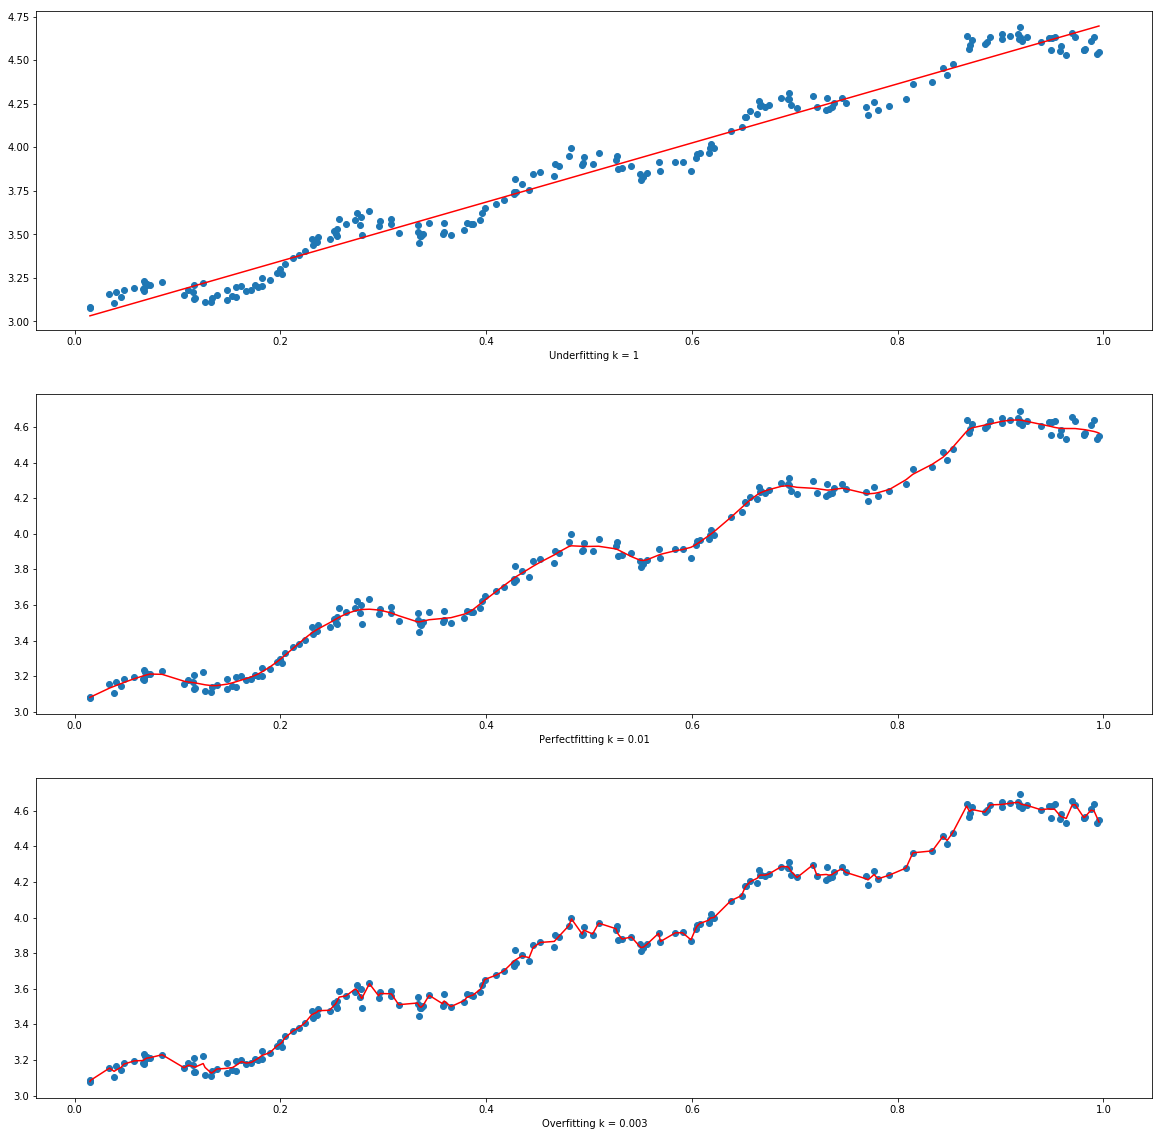

In [187]:
def loadData(file):
    data = np.loadtxt(file)
    features = data[:, 0:-1]
    labels = data[:,-1]
    return features, labels

def lwlr_weights(testSample, features, labels, k = 1.0):
    X = np.mat(features)
    y = np.mat(labels[:, np.newaxis])
    m = X.shape[0]
    W = np.mat(np.eye(m)) # W 是一个对角矩阵
    for i in range(m):
        diffVec = testSample - X[i, :]
        W[i, i] = np.exp(diffVec * diffVec.T / (-2.0 * k ** 2))
    xTwx = X.T * (W * X)
    if (np.linalg.det(xTwx) == 0.0):
        print('The matrix is singular!')
        return
    weights = xTwx.I * (X.T * (W * y))
    return testSample * weights

def lwlr_test(features, labels, k = 1.0):
    m = features.shape[0]
    yHat = np.zeros(m)
    for i in range(m):
        yHat[i] = lwlr_weights(features[i], features, labels, k)
    return yHat

def plot_lwlr():
    features, labels = loadData('ex0.txt')
    # k = 1
    k = 1
    yHat = lwlr_test(features, labels, k)
    x_1 = features[:,1].copy()
    x_indices = np.argsort(x_1)
    m = features.shape[0]
    plt.figure(figsize=(20, 20))
    plt.subplot(311)
    plt.scatter(features[:,1], labels)
    plt.plot(x_1[x_indices], yHat[x_indices], c='r')
    plt.xlabel('Underfitting k = 1')
    
    # k = 0.01
    k = 0.01
    yHat = lwlr_test(features, labels, k)
    x_1 = features[:,1].copy()
    x_indices = np.argsort(x_1)
    m = features.shape[0]
    plt.subplot(312)
    plt.scatter(features[:,1], labels)
    plt.plot(x_1[x_indices], yHat[x_indices], c='r')
    plt.xlabel('Perfectfitting k = 0.01')
    
    # k = 0.003
    k = 0.003
    yHat = lwlr_test(features, labels, k)
    x_1 = features[:,1].copy()
    x_indices = np.argsort(x_1)
    m = features.shape[0]
    plt.subplot(313)
    plt.scatter(features[:,1], labels)
    plt.plot(x_1[x_indices], yHat[x_indices], c='r')
    plt.xlabel('Overfitting k = 0.003')
    
    plt.show()

plot_lwlr()


### Predicting abalone ages 预测鲍鱼的年龄

In [194]:
def rss_Error(yHat, y):
    ''' 计算误差 '''
    return ((yHat - y) ** 2).sum()

features, labels = loadData('abalone.txt')
features = np.insert(features, 0, 1.0, 1) 

yHat05 = lwlr_test(features[0:99], labels[0:99], 0.5)
yHat1 = lwlr_test(features[0:99], labels[0:99], 1)
yHat10 = lwlr_test(features[0:99], labels[0:99], 10)

rss_Error(yHat01, labels[0:99]), rss_Error(yHat1, labels[0:99]), rss_Error(yHat10, labels[0:99])

(311.68199750138598, 409.77316815145048, 532.83564463099799)

### 收缩特征系数来更好的理解数据 (Shrinking coefficients to understand our data)
当训练样本的个数小于特征数时，我们就无法使用 $(X^TX)^{-1}$ 了，因为这时矩阵不可逆了。我们使用 `ridge regression` 来计算。 使用 `ridge regression` 的计算方法是使用 $(X^TX + \lambda I)^{-1} X^T y$ 来计算。

In [100]:
def loadData(file):
    data = np.loadtxt(file)
    features = data[:, 0:-1]
    labels = data[:, -1]
    return features, labels

def data_normalization(features, labels):
    xMat = np.mat(features)
    X = (xMat - xMat.mean(axis=0)) / xMat.var()
    y = labels - labels.mean()
    y = np.mat(y[:, np.newaxis])
    return X, y

def ridge_regression(X, y, lam = 0.2):
    ''' ridge regression '''
    m = X.shape[1]
    xT = X.T
    lamI = lam * np.eye(m) 
    xTxLam = xT * X + lamI
    if (np.linalg.det(xTxLam) == 0.0):
        print("The matrix is singular.")
    return xTxLam.I * xT * y

def ridge_test(X, y):
    numTest = 30
    wMat = np.zeros((numTest, X.shape[1]))
    for i in range(numTest):
        ws = ridge_regression(X, y, np.exp(i - 10))
        wMat[i, :] = ws.T
    return wMat

features, labels = loadData('abalone.txt')
num = 5
X,y = data_normalization(features, labels)
# 只查看 5 个样本来计算
sam5_weights = ridge_regression(X[:5], y[:5])
sam60_weights = ridge_regression(X[:-60], y[:-60])
samall_weights = ridge_regression(X, y)
df = pd.DataFrame([
    np.squeeze(sam5_weights.tolist()), 
    np.squeeze(sam60_weights.tolist()),
    np.squeeze(samall_weights.tolist())
])
print(df)

# 全部的通过改变 lambda 的值来改变看参数的变化结果。

ws = ridge_test(X, y)

          0         1         2         3         4         5         6  \
0  0.388489  2.562745  2.988649 -2.034953  0.029541 -0.295311 -1.208798   
1  0.012168 -0.297401  2.470269  2.137470  1.695476 -3.715291 -1.801052   
2  0.011600 -0.275434  2.431910  2.158408  1.683466 -3.694885 -1.774432   

          7  
0 -0.048264  
1  1.583834  
2  1.569173  


从回归的图中可以看出 w0, w1 从开始到结束都在 0 左右变化很小，可以说对回归模型的贡献度很小。

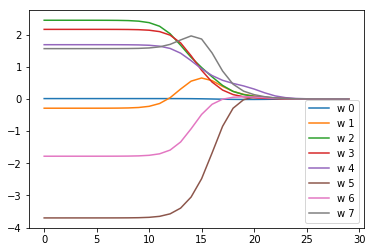

,0,1,2,3,4,5,6,7
0,0.011614,-0.287631,2.447468,2.163685,1.686993,-3.698595,-1.780111,1.564822
1,0.011614,-0.287626,2.447461,2.163683,1.686992,-3.698593,-1.780109,1.564824
2,0.011614,-0.287613,2.447445,2.163677,1.686988,-3.698590,-1.780103,1.564829
3,0.011614,-0.287577,2.447399,2.163662,1.686978,-3.698579,-1.780086,1.564841
4,0.011614,-0.287481,2.447276,2.163621,1.686950,-3.698550,-1.780042,1.564876
5,0.011613,-0.287218,2.446942,2.163508,1.686875,-3.698470,-1.779920,1.564969
6,0.011612,-0.286506,2.446032,2.163202,1.686670,-3.698255,-1.779591,1.565222
7,0.011610,-0.284572,2.443567,2.162370,1.686113,-3.697670,-1.778695,1.565910
8,0.011604,-0.279350,2.436906,2.160112,1.684604,-3.696083,-1.776265,1.567772
9,0.011588,-0.265391,2.419095,2.153995,1.680523,-3.691783,-1.769688,1.572786


In [101]:
numFeatures = X.shape[1]
wsLabels = ['w ' + str(i) for i in range(numFeatures)]
a = plt.plot(ws)
plt.legend(a, wsLabels)
plt.show()
pd.DataFrame(ws)

(5, 10)
[[ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]
 [ 0  1  2  3  4  5  6  7  8  9]
 [10 10 10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10 10 10]]
(30, 8)


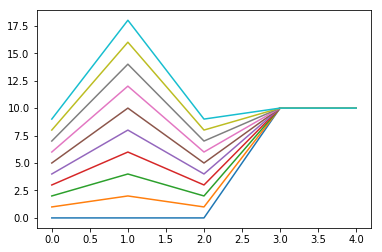

In [29]:
'''
上面的图表示提什么意思那? 是表示训练出来的 8 个 weights 的在 30 迭代时的变化过程，可以看出在 lam = exp(19) 时的时候
 weights 都趋于 0 了.
'''
a = np.array([
    [x for x in np.arange(10)], 
    [x * 2 for x in np.arange(10)], 
    [x  for x in np.arange(10)],
    [10  for x in np.arange(10)],
    [10  for x in np.arange(10)]
])
print(a.shape)
print(a)
print(ws.shape)
# print(ws[:, 0:6])
plt.plot(a)
plt.show()
np.newaxis

上面的结果在 lamda = exp(-9) ~ exp(19) 的时候，拟合出的参数很不样，那我们怎么确定那个才是最好的那? 为此我们需要做一下交叉验证（cross validation）.

### Stagewise Regression
Stage wise regression 使用贪心算法，逐步计算回归参数，初始时设定初始参数为 0。使用这个算法可以让我们更好的理解我们样本的参数。

[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]


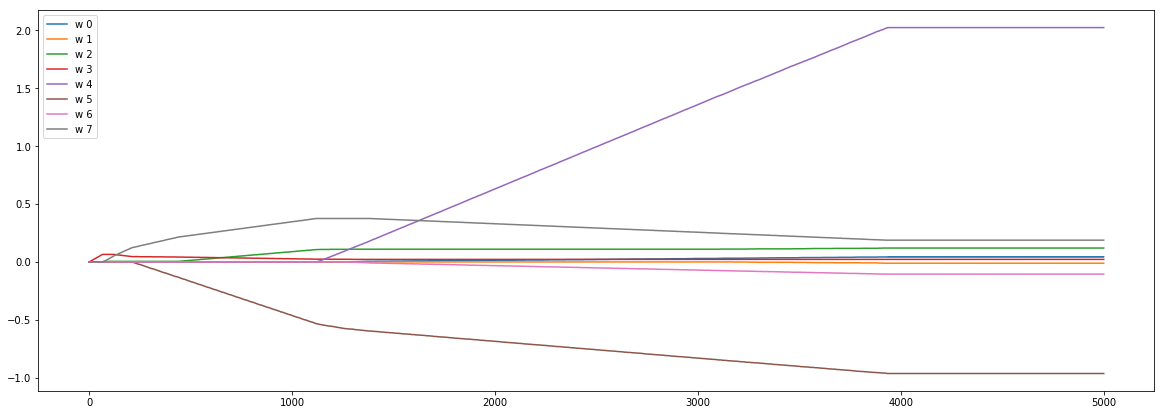

In [106]:
## Stagewise Regression

def loadData(file):
    ''' 加载数据 '''
    data = np.loadtxt(file)
    features = data[:, 0:-1]
    labels = data[0:, -1]
    return features, labels

def normalizeData(features, labels):
    '''data normalizition 用 z 分数 ， zero'''
    fMean = features.mean(axis = 0)
    fVar = features.var(axis = 0)
    X = np.mat((features - fMean) / fVar)
    y = np.mat(labels - labels.mean())
    return X,y.T
def rssError(y, yHat):
    return ((y - yHat).A.squeeze() ** 2).sum()

def stageWiseRegression(X, y, alpha = 0.01, itNum = 100):
    numSamples, numFeatures = X.shape
    ws = np.mat(np.zeros((numFeatures, 1)))
    wsHis = np.zeros((itNum, numFeatures)) # 记录迭代的历史
    minWs = ws.copy()
    
    for i in range(itNum):
        currentWs = minWs.copy()
        minRss = np.Inf
        for j in range(numFeatures):
            for sign in [-1, 1]:
                ws = currentWs.copy()
                ws[j] += sign * alpha
                yHat = X * ws
                rss = rssError(yHat, y)
                if rss < minRss:
                    minRss = rss
                    minWs = ws.copy()
        wsHis[i] = ws.T.copy()
    return minWs, wsHis

def main():
    features, labels = loadData('abalone.txt')
    X, y = normalizeData(features, labels)
    ws, wsHis = stageWiseRegression(X, y, 0.001, 5000)
    print(ws.T)
    plt.figure(figsize=(20, 7))
    lines = plt.plot(wsHis)
    numFeatures = X.shape[1]
    lineLabels = ['w ' + str(i) for i in range(numFeatures)]
    plt.legend(lines, lineLabels)
    plt.show()
    

if __name__ == '__main__':
    main()



从上面的回归结果，和绘制的结果可以看出，在 4000 次迭代后参数趋于稳定，也可看出 w1 几乎没什么变化，对于模型可能没有什么贡献，在开始 w1，w6 都没有什么贡献，最后 w6 还是有点变化的。 但逐步回归算法的优点并不是画出，而是让我们能更好的理解我们的特征，那些特征对我们贡献最大，哪些不重要的特征可以不用收集了。